# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
sns.set(color_codes=True)
%matplotlib inline


In [2]:
print(pd.__version__)
print(np.__version__)
print(sns.__version__)


1.0.5
1.18.4
0.10.1


# Loading and Reviewing the Data¶


In [3]:
diabetes = pd.read_csv("diabetes.csv")


In [4]:
diabetes.shape


(768, 9)

In [5]:
diabetes.head(10)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
diabetes.tail(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0



# Check for null values¶


In [7]:
print (diabetes.isnull().values.any())


False


# Correlated Feature Check¶


Helper function that displays correlation by color. Red is most correlated, Blue least.

In [8]:
def plot_corr(diabetes, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = diabetes.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


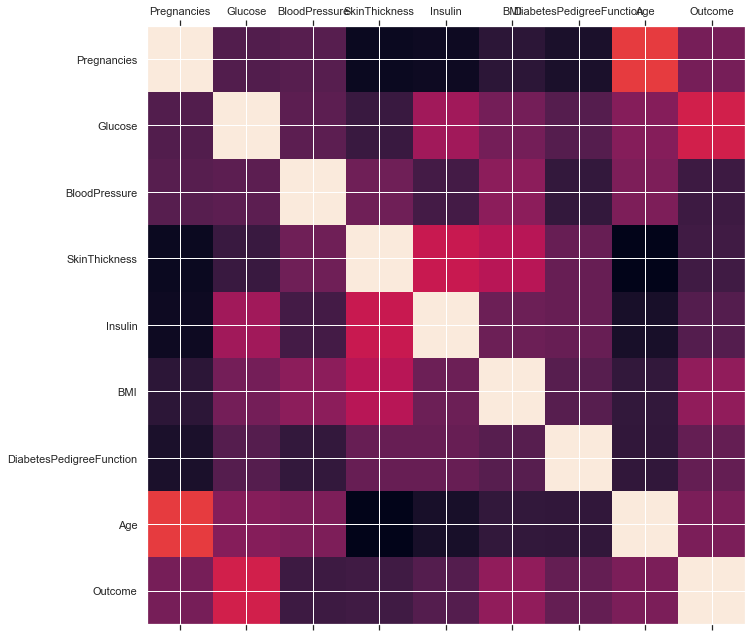

In [9]:
plot_corr(diabetes)

In [10]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [11]:
diabetes.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check for additional correlations

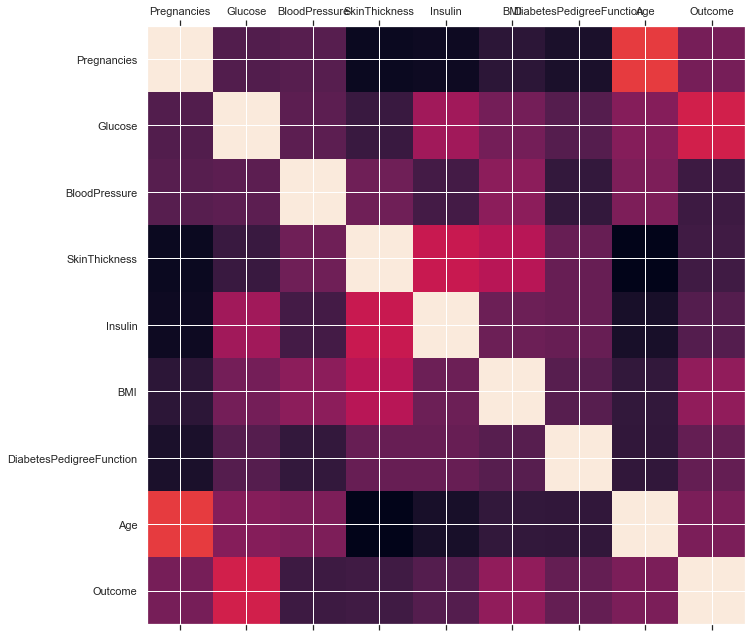

In [12]:
plot_corr(diabetes)


The correlations look good. There appear to be no coorelated columns.

# Check for null values¶


In [13]:
diabetes.isnull().values.any()


False

No obvious null values.

# Statistical analysis

In [14]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


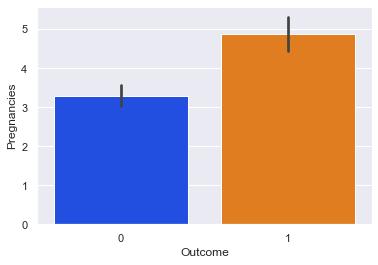

In [15]:
sns.barplot(x='Outcome',y='Pregnancies',data=diabetes,palette="bright")


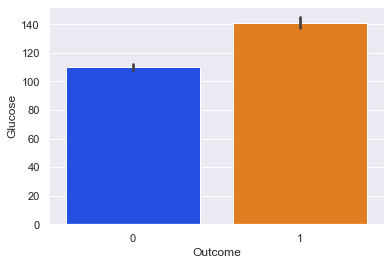

In [16]:
sns.barplot(x='Outcome',y='Glucose',data=diabetes,palette="bright")

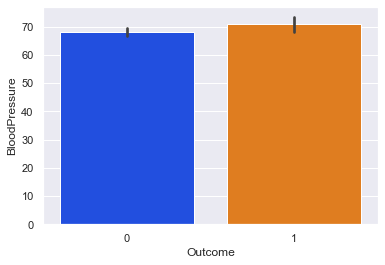

In [17]:
sns.barplot(x='Outcome',y='BloodPressure',data=diabetes,palette="bright")


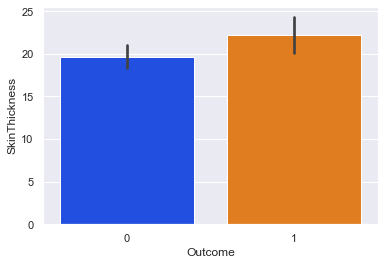

In [18]:
sns.barplot(x='Outcome',y='SkinThickness',data=diabetes,palette="bright")


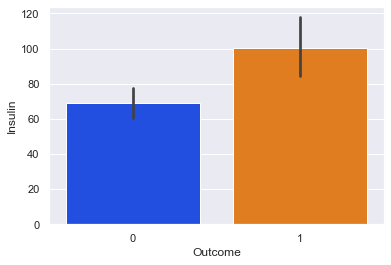

In [19]:
sns.barplot(x='Outcome',y='Insulin',data=diabetes,palette="bright")


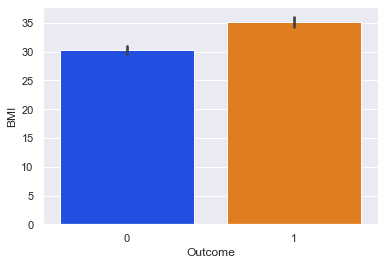

In [20]:
sns.barplot(x='Outcome',y='BMI',data=diabetes,palette="bright")

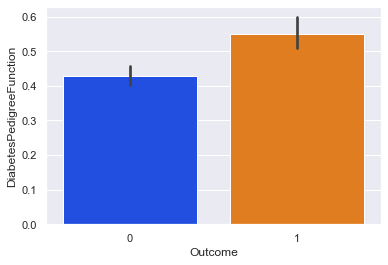

In [21]:
sns.barplot(x='Outcome',y='DiabetesPedigreeFunction',data=diabetes,palette="bright")

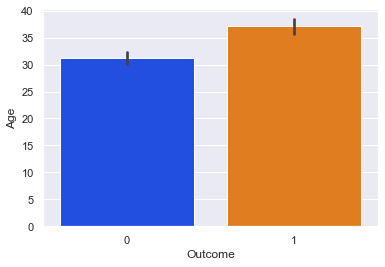

In [22]:
sns.barplot(x='Outcome',y='Age',data=diabetes,palette="bright")


# Check class distribution¶


Rare events are hard to predict

In [23]:
num_obs = len(diabetes)
num_true = len(diabetes.loc[diabetes['Outcome'] == 1])
num_false = len(diabetes.loc[diabetes['Outcome'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))


Number of True cases:  268 (34.90%)
Number of False cases: 500 (65.10%)


Good distribution of true and false cases. No special work needed.



# Spliting the data¶


70% for training, 30% for testing



In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#Splitting the dataset into training and test data.
# 80% of the data will be in training data and 20% of the data will be in testing
X = diabetes.drop(['Outcome'],axis=1)
y = diabetes.Outcome
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)


In [26]:
from sklearn.model_selection import train_test_split


In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)


In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(576, 8)
(192, 8)
(576,)
(192,)


# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression() # creating an object for Logistic Regression
## We have to apply this object(log_reg) to the training data
log_reg.fit(X_train, y_train) # with help of fit method we are fitting the 
                            ##Logistic Regression on training data
## objectName.fit(InputData, OutputData)


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting on Train data¶


In [30]:
y_train_pred = log_reg.predict(X_train)


In [31]:
y_train ==y_train_pred


118     True
205     True
506     True
587     True
34      True
       ...  
645    False
715     True
72      True
235     True
37     False
Name: Outcome, Length: 576, dtype: bool

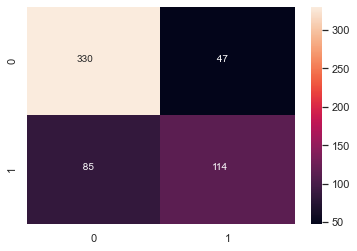

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})

-> Finding the accuracy score:



In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_train_pred)


0.7708333333333334

-> Print the classification report and check the accuracy of the training data



In [34]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.80      0.88      0.83       377
           1       0.71      0.57      0.63       199

    accuracy                           0.77       576
   macro avg       0.75      0.72      0.73       576
weighted avg       0.77      0.77      0.76       576



### -> We got an accuracy score of around 78% for the training Now let’s check the same for test data.



# Predicting on Test data¶


In [35]:
y_test_pred = log_reg.predict(X_test)


In [36]:
y_test==y_test_pred


285     True
101     True
581     True
352     True
726     True
       ...  
247    False
189    False
139     True
518     True
629     True
Name: Outcome, Length: 192, dtype: bool

#### -> Visualizing the confusion matrix using heat map



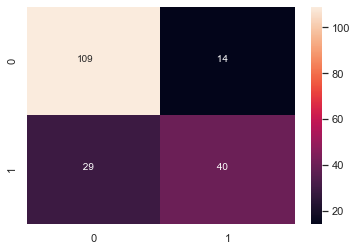

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


-> Finding the accuracy score:



In [38]:
accuracy_score(y_test, y_test_pred)


0.7760416666666666

-> Print the classification report and check the accuracy of the testing data



In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.74      0.58      0.65        69

    accuracy                           0.78       192
   macro avg       0.77      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



### We got an accuracy score of around 77% for the testing



# Naive Bayes Classifier¶


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)


GaussianNB()

# Predicting on Train data¶


In [41]:
y_train_pred = classifier.predict(X_train)
y_train==y_train_pred


663     True
712     True
161     True
509     True
305     True
       ...  
645    False
715     True
72      True
235     True
37     False
Name: Outcome, Length: 614, dtype: bool

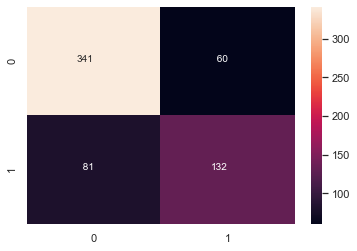

In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


### -> Print the classification report and check the accuracy of the training data



In [43]:
print(classification_report(y_train,y_train_pred))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       401
           1       0.69      0.62      0.65       213

    accuracy                           0.77       614
   macro avg       0.75      0.74      0.74       614
weighted avg       0.77      0.77      0.77       614



### -> Finding the accuracy score:



In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.7703583061889251

# Predicting on Test data¶


In [45]:
y_test_pred = classifier.predict(X_test)
y_test==y_test_pred


285    True
101    True
581    True
352    True
726    True
       ... 
563    True
318    True
154    True
684    True
643    True
Name: Outcome, Length: 154, dtype: bool

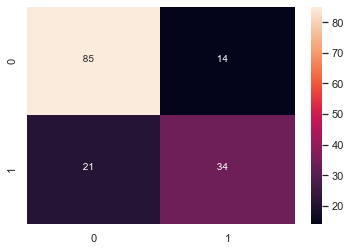

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [47]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)


0.7727272727272727

# K Neighbors Classifier¶


In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Apply the knn object on the dataset(Training Phase)
# Syntax: objectName.fit(Input, Output)
Knn.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean')

# Predicting on train data

In [50]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = Knn.predict(X_train)
y_train==y_train_pred


602    False
429     True
623     True
209     True
589     True
       ...  
534     True
584     True
493    False
527     True
168     True
Name: Outcome, Length: 614, dtype: bool

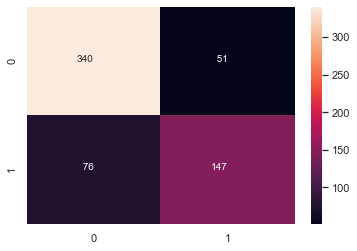

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [52]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       391
           1       0.74      0.66      0.70       223

    accuracy                           0.79       614
   macro avg       0.78      0.76      0.77       614
weighted avg       0.79      0.79      0.79       614



In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.7931596091205212

# Predicting on Test data¶


In [54]:
# Prediction on  training data
y_test_pred = Knn.predict(X_test)
y_test==y_test_pred


158     True
251     True
631     True
757     True
689    False
       ...  
733     True
441     True
627    False
84      True
55      True
Name: Outcome, Length: 154, dtype: bool

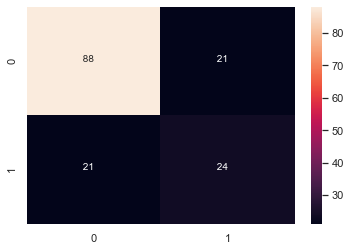

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_test, y_test_pred)
conf
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)


0.7272727272727273

In [57]:
# Classification Report for Test Data
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.81      0.81      0.81       109
           1       0.53      0.53      0.53        45

    accuracy                           0.73       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.73      0.73      0.73       154



# Support Vector Machine

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)


SVC()

# Prediction on Train data

In [59]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = classifier.predict(X_train)
y_train==y_train_pred


663     True
712    False
161     True
509     True
305     True
       ...  
645    False
715     True
72     False
235     True
37     False
Name: Outcome, Length: 614, dtype: bool

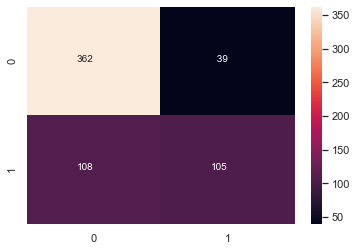

In [60]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [61]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.77      0.90      0.83       401
           1       0.73      0.49      0.59       213

    accuracy                           0.76       614
   macro avg       0.75      0.70      0.71       614
weighted avg       0.76      0.76      0.75       614



In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.760586319218241

# Predicting on Test data¶


In [63]:
y_test_pred = classifier.predict(X_test)
y_test==y_test_pred


285     True
101    False
581     True
352     True
726     True
       ...  
563     True
318     True
154     True
684     True
643     True
Name: Outcome, Length: 154, dtype: bool

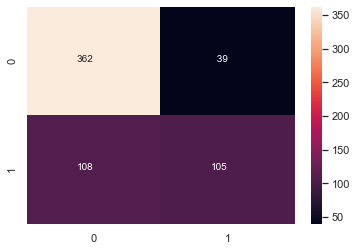

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [65]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)


0.7857142857142857


# DTC

In [67]:
# Importing the decision tree classifier algorithm and Applying the DTC algorithm
from sklearn import tree
DTC=tree.DecisionTreeClassifier(random_state=15)
DTC.fit(X_train, y_train)


DecisionTreeClassifier(random_state=15)

# Predicting on train data

In [71]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = DTC.predict(X_train)
y_train==y_train_pred


602     True
429     True
623     True
209     True
589     True
       ...  
534     True
584     True
493    False
527     True
168     True
Name: Outcome, Length: 614, dtype: bool

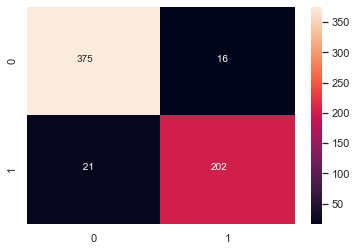

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [73]:
# Check the accuracy, classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_train_pred))


              precision    recall  f1-score   support

           0       0.95      0.96      0.95       391
           1       0.93      0.91      0.92       223

    accuracy                           0.94       614
   macro avg       0.94      0.93      0.93       614
weighted avg       0.94      0.94      0.94       614



In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)


0.9397394136807817

# Predicting on Test data¶


In [76]:
y_test_pred = DTC.predict(X_test)
y_test==y_test_pred


158     True
251     True
631     True
757     True
689     True
       ...  
733     True
441     True
627     True
84     False
55      True
Name: Outcome, Length: 154, dtype: bool

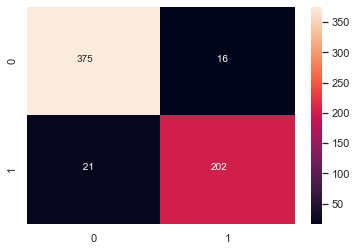

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf = confusion_matrix(y_train, y_train_pred)
conf
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='3.0f', annot_kws={'size':'10', "ha": 'right',"va": 'baseline'})


In [78]:
print(classification_report(y_test,y_test_pred))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       0.87      0.87      0.87        45

    accuracy                           0.92       154
   macro avg       0.91      0.91      0.91       154
weighted avg       0.92      0.92      0.92       154



In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)


0.922077922077922

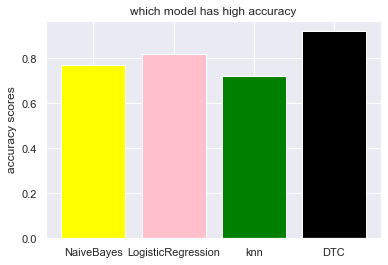

In [81]:
models=['NaiveBayes','LogisticRegression','knn','DTC']
accuracy_scores=[0.77,0.82,0.72,0.92]
plt.bar(models,accuracy_scores,color=['yellow','pink','green','black'])
plt.ylabel("accuracy scores")
plt.title("which model has high accuracy")
plt.show()
